# Unit 6 Assignment: Part 1 

## The Titanic Database edited by Alex Chen

### Part A

**1. Read in the Titanic cvs dataset as "data".**

In this case, I print the head five lines of the dataset to test my code.

In [133]:
# Load the data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("titanic.csv")
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Part B

**2. Clean up any data necessary. In this case, I round the age.**

Since the dataset is already very clean, the only thing I can do is processing the data of age into integer.

In [134]:
round(data["Age"])
data.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


### Part C

**3. Create at least 5 plots that help explain the data.**

I. The Bar Graph of Survived and Unsurvived Passenger on each class.

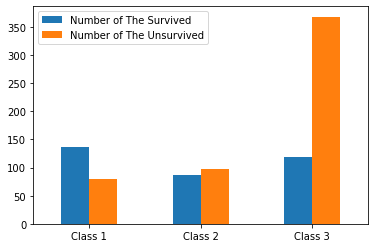

In [135]:
# Bar Graph
S1 = data[(data['Survived'] == 1) & (data['Pclass'] == 1)]
U1 = data[(data['Survived'] == 0) & (data['Pclass'] == 1)]
S2 = data[(data['Survived'] == 1) & (data['Pclass'] == 2)]
U2 = data[(data['Survived'] == 0) & (data['Pclass'] == 2)]
S3 = data[(data['Survived'] == 1) & (data['Pclass'] == 3)]
U3 = data[(data['Survived'] == 0) & (data['Pclass'] == 3)]
Spassenger = [S1.shape[0],S2.shape[0],S3.shape[0]]
Upassenger = [U1.shape[0],U2.shape[0],U3.shape[0]]

##Split every number of passengers into each class and print out
index = ['Class 1', 'Class 2', 'Class 3']
df = pd.DataFrame({'Number of The Survived': Spassenger,'Number of The Unsurvived': Upassenger}, index=index)
ax = df.plot.bar(rot=0)

**Plot Explanation:** This bar graph compares the number of survived and unsurvived passenger on each class. It is easy to determine that higher class passengers enjoy higher survival rate in Titanic. The total numbers of class 1 and class 2 passengers are similar but both of them are far less than the number of class 3 passengers. For my perspective, Pclass is a very closely related variable to help researchers build the machine learning model and I guess higher class would be more equipped by better survival device.

**Code Explanation:** In order to compare all of the passenger numbers directly especially on the same class, I choose bar graph and put the number of the survived and unsurvived into the same index. The filter is the key of this plot for finding six values with different survival situation and Pclass. After that, I call the DataFrame.plot.bar function to create this plot and set the rot as zero.

II. The Pie Chart of Survived and Unsurvived Male and Female.

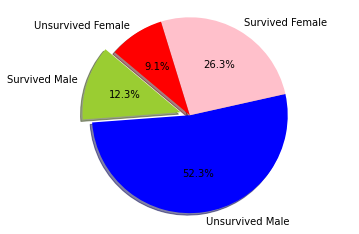

In [136]:
#Pie Chart
labels = 'Survived Male', 'Unsurvived Male', 'Survived Female', 'Unsurvived Female'
SM = data[(data['Survived'] == 1) & (data['Sex'] == 'male')]
UM = data[(data['Survived'] == 0) & (data['Sex'] == 'male')]
SF = data[(data['Survived'] == 1) & (data['Sex'] == 'female')]
UF = data[(data['Survived'] == 0) & (data['Sex'] == 'female')]
sizes = [SM.shape[0], UM.shape[0], SF.shape[0], UF.shape[0]]
colors = ['yellowgreen','blue','pink', 'red']
explode = (0.1, 0, 0, 0)  #explode 1st slice

##Show
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

**Plot Explanation:** This pie chart state the ratio of male and female with survival situation. Although the majority of the Titanic passengers are male, it is obvious that the survival rate of female are much higher than the survival rate of male. In my opinion, female passengers are more likely to be saved due to their physical weakness especially in accident.

**Code Explanation**: In order to calculate and state the percentage of these four values clearly, I choose pie chart. At the begining, I use the filter to find the values of male and female whether they are survived or unsurvived. After that, I call the function plt.pie with various colors and set the axis to 'equal'. Exploding the first slice is necessary because it notice the reader where to begin with.

III. The Histogram of Age Probability of The Survived and The Unsurvived.

In [137]:
##Here is the data collection
totalage =  data
sage = data[data['Survived'] == 1]
uage = data[data['Survived'] == 0]

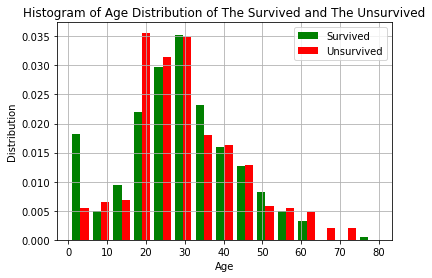

In [138]:
#Histogram
plt.hist([sage['Age'],uage['Age']],15,density=True, color=['green','red'], label=['Survived','Unsurvived'])
plt.legend(prop={'size': 10})
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title("Histogram of Age Distribution of The Survived and The Unsurvived")
plt.grid(True)

plt.show()

**Plot Explanation:** The histogram shows the distribution of different ages whether passengers are survived or unsurvived. To be honest, the distribution of the survived and unsurvived are very close on each age period so I would like to take a guess that age is not a related variable for creating machine learning model.

**Code Explanation**: In order to compare the distribution of various continuous ages, I choose the histogram for putting all values on the x-axis from 0-year-old to 80-year-old. I call the hist function to create the double index histogram for comparing. After that, I label x-axis, y-axis and the title and print it out.

IV. The Box Plot of Fare of The Survived and The Unsurvived

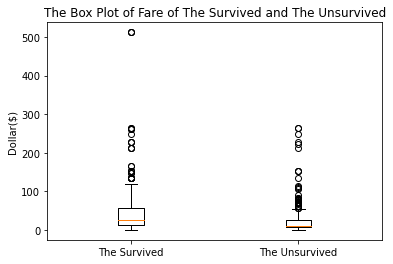

In [139]:
#Box Plot
plt.title('The Box Plot of Fare of The Survived and The Unsurvived')
plt.boxplot([sage['Fare'],uage['Fare']])
plt.ylabel("Dollar($)")
plt.xticks([1,2],["The Survived","The Unsurvived"])
plt.show()

**Plot Explanation:** The box plot states the spreads of fares from the survived and unsurvived. Generally speaking, the survived pay more than the unsurvived especially for those outliers. However, it is still obvious that the Q1 and Q3 of the fare of the unsurvived are located from the Q1 and the Q3 of the survived. In conclusion, I would consider fare as a possible variable to build the machine learning model but not the important variable.

**Code Explanation**: Firstly, I input the title of the box plot. Secondly, I set the databases of the fares from the survived and the unsurvived. After that, I input the y-axis label and x-axis ticks. In the end, I print it out.

V. The Scatter Plot of The Relatives Abroad and The Survival Rate.

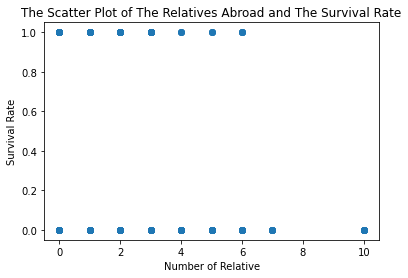

In [140]:
plt.scatter(data['Siblings/Spouses Aboard']+data['Parents/Children Aboard'],data['Survived'])
plt.title('The Scatter Plot of The Relatives Abroad and The Survival Rate')
plt.xlabel("Number of Relative")
plt.ylabel("Survival Rate")
plt.show()

**Plot Explanation:** The scatter plot shows the potential relationship between one independent variable and one dependent variable. In this case, it is really hard to identify a clear relationship between the number of relatives and the survival rate. From my perspective, the number of relatives could be useless for modeling machine learning.

**Code Explanation:** Firstly, I set the databases of the number of relatives and the survival rate as independent variable and dependent variable. Secondly, I input the title, x-axis label and y-axis label. In the end, I print it out.

### That is the end of my Exploratory Analysis of the Titanic Data Set. Thanks for reading!

## Alex Chen
## Ms. Postma
## ICS4U-01
## 2021/03/16

# Unit 6 Assignment: Part 2

## The Titanic Classification Algorithms edited by Alex Chen

### Part A

**Fix up my explorator analysis if necessary and change categorical data into numerical values.**

Since I have read in the dataset and cleaned it up in Part 1 Assignment, so there is no need to do it again!

In this case, I need to change all "Sex" data from categorical data into numerical values. As a result, I set 'female' as the value 0 and 'male' as the value 1.

In [141]:
data=data.replace(to_replace="female",value=0)
data=data.replace(to_replace="male",value=1)
##use the replace documentation to change the "Sex" data from categorical data into numerical values

### Part B

**I. Run all 6 classification algorithms at least once.**

**II. Summarize the results from each algorithm.**

Firstly, we load the dataset into x variable and Y variable for buliding our own models.

In [142]:
## Create training and testing sets

## y = survived
Y = data.iloc[:,0]

## x = Pclass, Sex, Age, Siblings, Parents and Fare
X = data.iloc[:,1 and 3:8]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Decision Trees (Depth = 1)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- class: 0



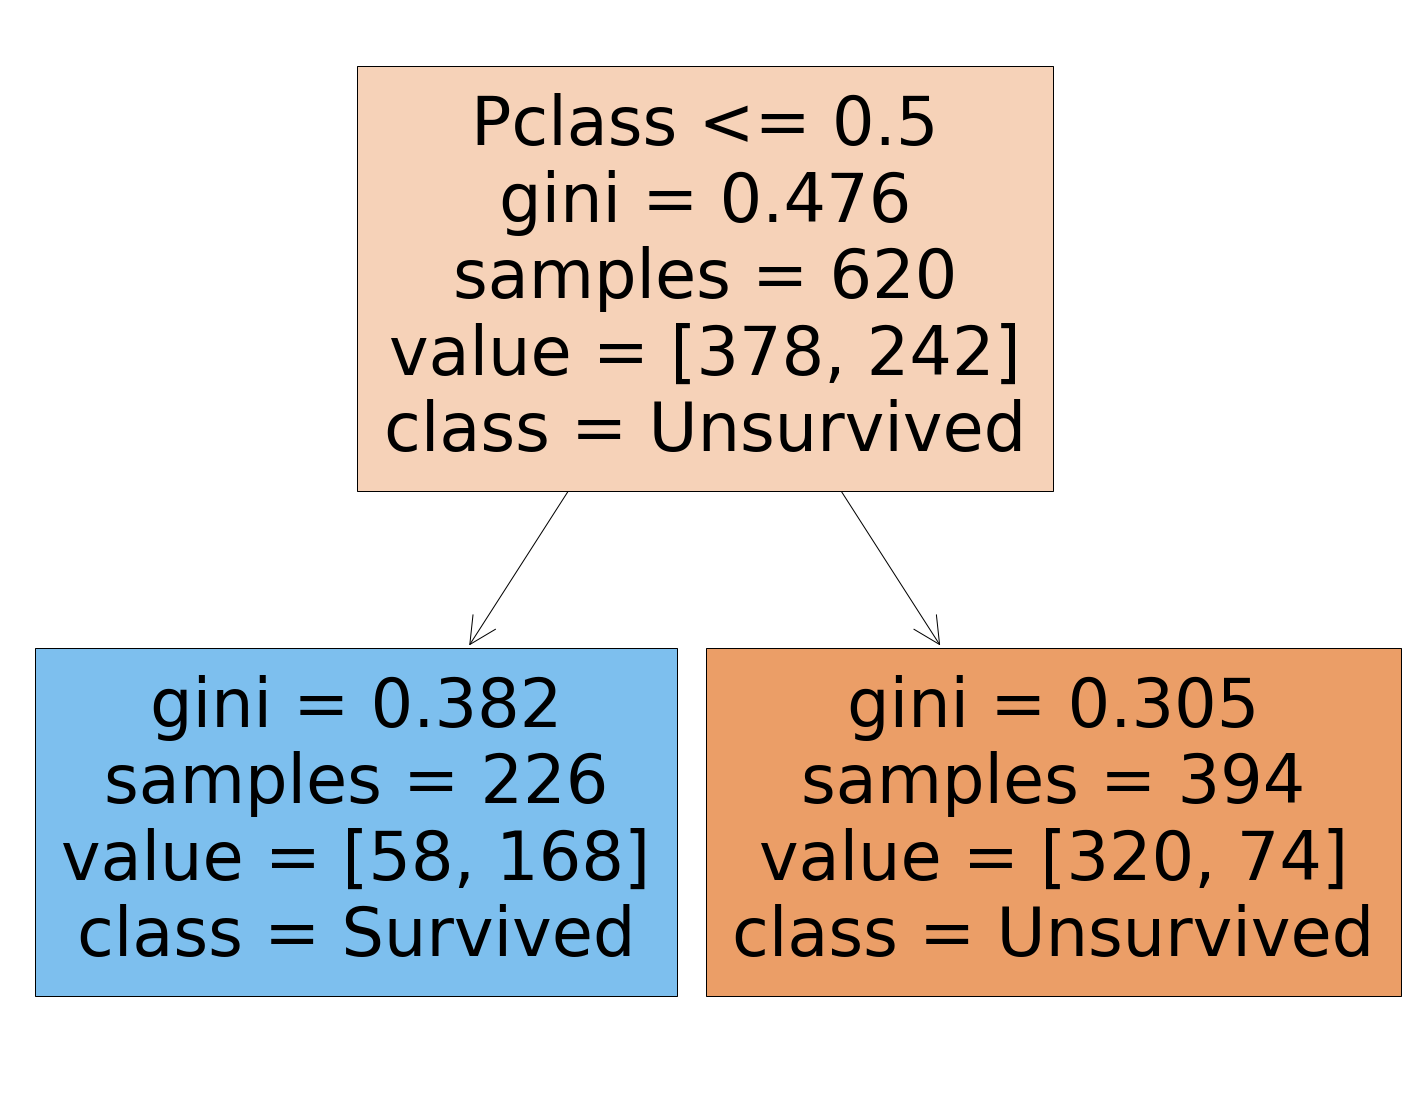

In [143]:
## import the library of Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
## set the depth as 1
model = DecisionTreeClassifier(max_depth=1)
clf = model.fit(X_train, y_train)
## print it as figure
fig = plt.figure(figsize=(25,20))
plt = tree.plot_tree(clf, feature_names=["Pclass", "Sex", "Age", "Siblings", "Parents", "Fare"], class_names=["Unsurvived", "Survived"], filled=True)

r = export_text(clf)
print(r)

## Evaluating Model's Performance

In [144]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:               precision    recall  f1-score   support

           0       0.80      0.86      0.83       167
           1       0.74      0.65      0.69       100

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267

Report Matrix:
 [[144  23]
 [ 35  65]]
Accuracy: 0.7827715355805244


**Summary**

For the Decision Tree model with the depth as 1, its accuracy is 0.78. The number of true positve samples is 134. The number of true negative samples is 75. The number of false positve samples is 31. The number of false negative samples is 27.

## Decision Trees (Depth = 5)

|--- feature_0 <= 0.50
|   |--- feature_4 <= 48.20
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_3 <= 3.50
|   |   |   |   |--- feature_4 <= 18.38
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  18.38
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  3.50
|   |   |   |   |--- feature_1 <= 38.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  38.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_4 <= 21.04
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  21.04
|   |   |   |   |--- feature_4 <= 31.33
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  31.33
|   |   |   |   |   |--- class: 0
|   |--- feature_4 >  48.20
|   |   |--- feature_1 <= 11.00
|   |   |   |--- class: 0
|   |   |--- feature_1 >  11.00
|   |   |   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_1 <= 9.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature

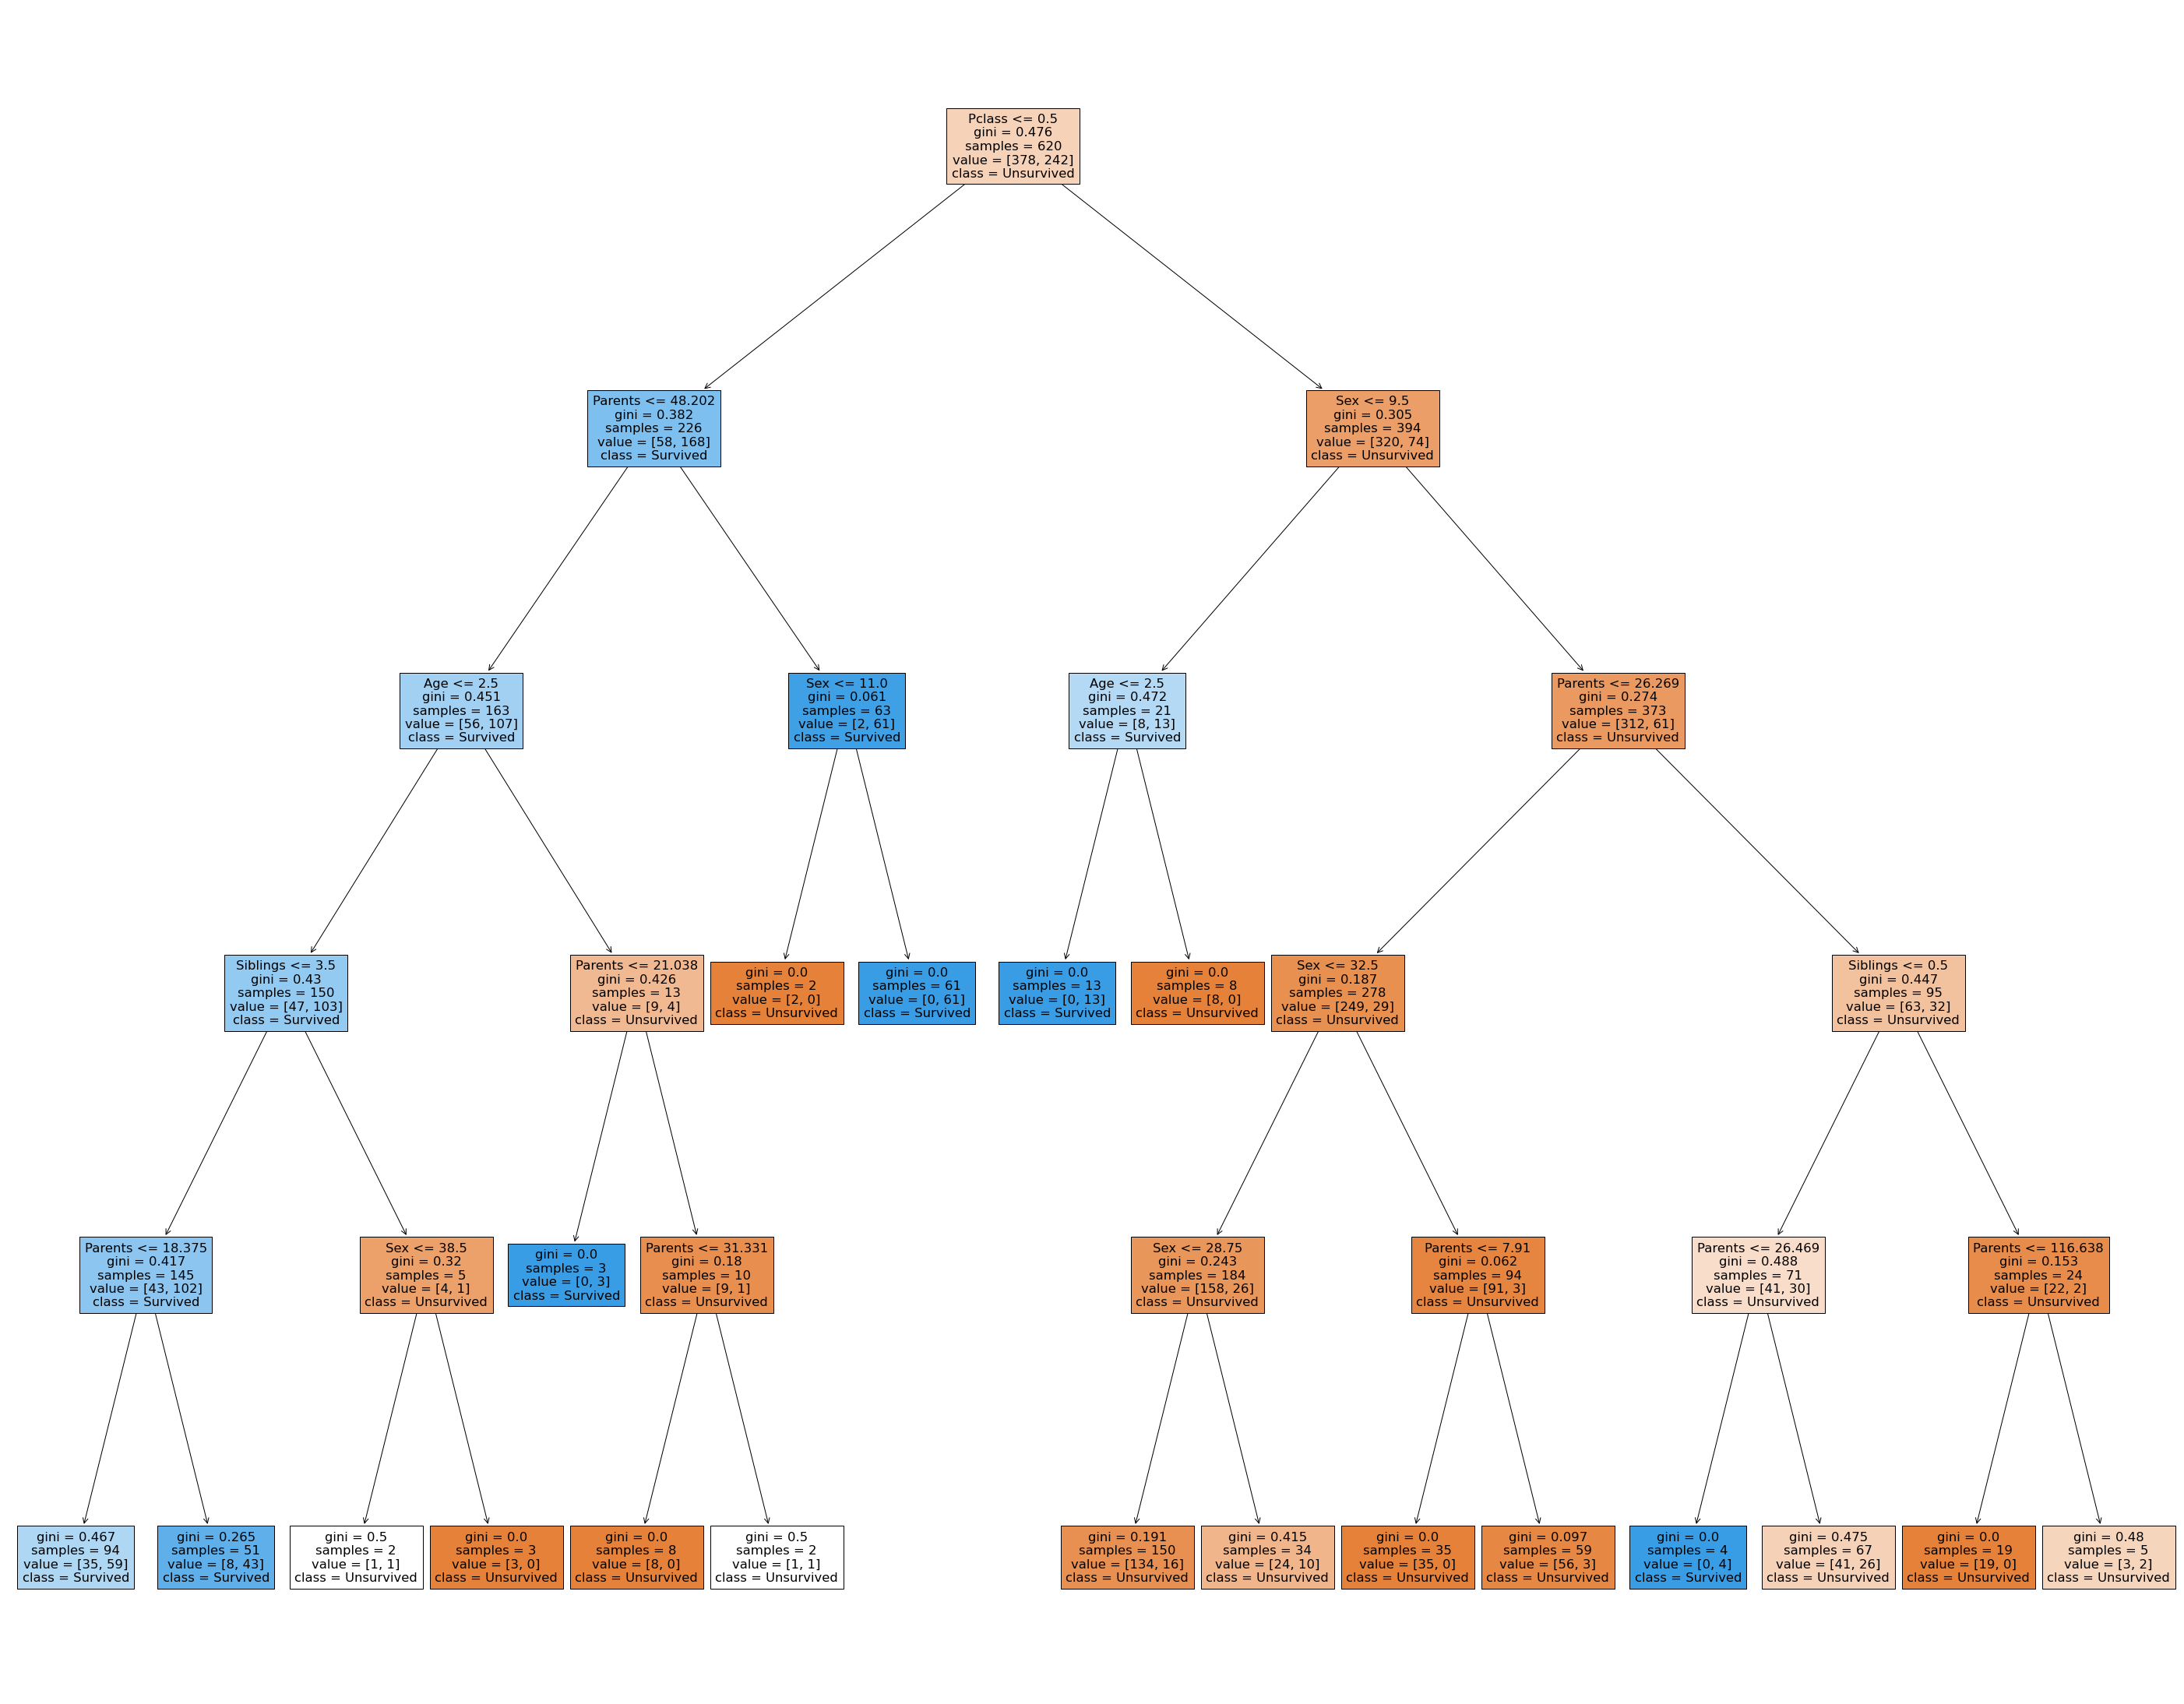

In [145]:
## import the library of Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
## set the depth as 5
model = DecisionTreeClassifier(max_depth=5)
clf = model.fit(X_train, y_train)
## print it as figure
fig = plt.figure(figsize=(50,40))
plt = tree.plot_tree(clf, feature_names=["Pclass", "Sex", "Age", "Siblings", "Parents", "Fare"], class_names=["Unsurvived", "Survived"], filled=True)

r = export_text(clf)
print(r)

## Evaluating Model's Performance

In [146]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:               precision    recall  f1-score   support

           0       0.84      0.89      0.87       167
           1       0.80      0.72      0.76       100

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

Report Matrix:
 [[149  18]
 [ 28  72]]
Accuracy: 0.8277153558052435


**Summary**

For the Decision Tree model with the depth as 5, its accuracy is 0.81. The number of true positve samples is 139. The number of true negative samples is 77. The number of false positve samples is 29. The number of false negative samples is 22. With the increase of depth, the model behaves more accurately.

## Decision Trees Comparison

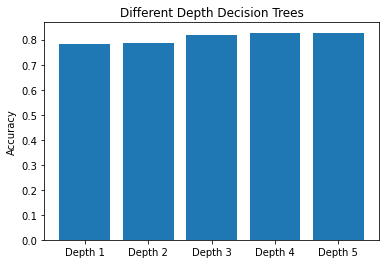

In [147]:
## import the library of Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
## set the depth as 1
modelone = DecisionTreeClassifier(max_depth=1)
## set the depth as 2
modeltwo = DecisionTreeClassifier(max_depth=2)
## set the depth as 3
modelthree = DecisionTreeClassifier(max_depth=3)
## set the depth as 4
modelfour = DecisionTreeClassifier(max_depth=4)
## set the depth as 5
modelfive = DecisionTreeClassifier(max_depth=5)

##fit all of them
clf = modelone.fit(X_train, y_train)
clf = modeltwo.fit(X_train, y_train)
clf = modelthree.fit(X_train, y_train)
clf = modelfour.fit(X_train, y_train)
clf = modelfive.fit(X_train, y_train)

##import all of them to predict
y_pred1 = modelone.predict(X_test)
y_pred2 = modeltwo.predict(X_test)
y_pred3 = modelthree.predict(X_test)
y_pred4 = modelfour.predict(X_test)
y_pred5 = modelfive.predict(X_test)

from sklearn import metrics
objects = ('Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5')
y_pos = np.arange(len(objects))
performance = [metrics.accuracy_score(y_test, y_pred1),metrics.accuracy_score(y_test, y_pred2),metrics.accuracy_score(y_test, y_pred3),metrics.accuracy_score(y_test, y_pred4),metrics.accuracy_score(y_test, y_pred5)]
##give x and y values, where x should be categorical
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Different Depth Decision Trees')
##print the comparison bar chart
plt.show()

**Summary**

After observing the histogram, in general, the greater the depth of the Decision Tree, the greater the accuracy, but at the same time the probability of overfitting increases. In conclusion, the most suitable size of the training model is the best.

## K-Nearest Neighbours

In [148]:
## import the library of K-Nearest Neighbours
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5,metric = "euclidean")
clf = model.fit(X_train, y_train)

## Evaluating Model's Performance

In [149]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:               precision    recall  f1-score   support

           0       0.78      0.83      0.80       167
           1       0.68      0.61      0.64       100

    accuracy                           0.75       267
   macro avg       0.73      0.72      0.72       267
weighted avg       0.74      0.75      0.74       267

Report Matrix:
 [[138  29]
 [ 39  61]]
Accuracy: 0.7453183520599251


**Summary**

For the K-Nearest Neighbours model, its accuracy is 0.71. The number of true positve samples is 132 which is lower than the Decision Tree. The number of true negative samples is 57. The number of false positve samples is 49 which is higher than the Decision Tree. The number of false negative samples is 29.

## K-Nearest Neighbours Comparison

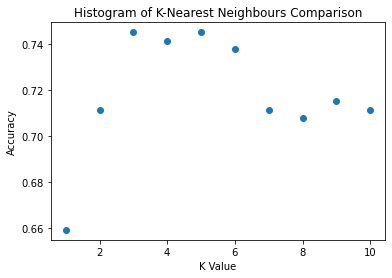

In [150]:
## import the library of K-Nearest Neighbours
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
a = [1,2,3,4,5,6,7,8,9,10]
ac = [1,2,3,4,5,6,7,8,9,10]

##use for loop to calculate the accuracy
for n in range(1,11):
    model = KNeighborsClassifier(n_neighbors = n,metric = "euclidean")
    clf = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac[n-1] = metrics.accuracy_score(y_test, y_pred)

##print it as a scatter plot
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title("Histogram of K-Nearest Neighbours Comparison")
plt.scatter(a, ac)
plt.show()

**Summary**

When K value is equal to 5, the accuracy is the greatest. With the increasing of the K value of KNN model from 1 to 10, the data of accuracy fluctuates until the K value reaches 7. After that, the data of accuracy rounds about 0.71 for all.

If you choose a smaller K value, it is equivalent to predicting with training examples in a smaller field. Conversely, if you choose a larger K value, it is equivalent to using training examples in a larger field to make predictions.

## Naive Bayes

In [151]:
## import the library of Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

## Evaluating Model's Performance

In [152]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:               precision    recall  f1-score   support

           0       0.81      0.87      0.84       167
           1       0.76      0.66      0.71       100

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267

Report Matrix:
 [[146  21]
 [ 34  66]]
Accuracy: 0.7940074906367042


**Summary**

For the Naive Bayes model, its accuracy is 0.80. The number of true positve samples is 134. The number of true negative samples is 79. The number of false positve samples is 27. The number of false negative samples is 27.

## LDA

In [153]:
## import the library of LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

## Evaluating Model's Performance

In [154]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:               precision    recall  f1-score   support

           0       0.81      0.86      0.83       167
           1       0.74      0.66      0.70       100

    accuracy                           0.79       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.79      0.78       267

Report Matrix:
 [[144  23]
 [ 34  66]]
Accuracy: 0.7865168539325843


**Summary**

For the LDA model, its accuracy is 0.78. The number of true positve samples is 133. The number of true negative samples is 76. The number of false positve samples is 30. The number of false negative samples is 28.

## SVM

In [155]:
## import the library of SVM
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(X_train, y_train)

SVC(gamma='auto')

## Evaluating Model's Performance

In [156]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:               precision    recall  f1-score   support

           0       0.75      0.84      0.79       167
           1       0.66      0.53      0.59       100

    accuracy                           0.72       267
   macro avg       0.71      0.68      0.69       267
weighted avg       0.72      0.72      0.72       267

Report Matrix:
 [[140  27]
 [ 47  53]]
Accuracy: 0.7228464419475655


**Summary**

For the SVM model, its accuracy is 0.69. The number of true positve samples is 141 which is higher than the Decision Tree. The number of true negative samples is 43. The number of false positve samples is 63. The number of false negative samples is 20.

## Logistic Regression

In [157]:
## import the library of Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Evaluating Model's Performance

In [158]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:               precision    recall  f1-score   support

           0       0.82      0.89      0.85       167
           1       0.79      0.67      0.72       100

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267

Report Matrix:
 [[149  18]
 [ 33  67]]
Accuracy: 0.8089887640449438


**Summary**

For Logistic Regression model, its accuracy is 0.79. The number of true positve samples is 135. The number of true negative samples is 77. The number of false positve samples is 29. The number of false negative samples is 26.

### Part C

**I. Run all of the algorithms in their optimal states using k-fold cross validation.**

**II. Summarize the results and make conclusions based on the results and the definitions of the algorithms.**

## Cross Validation

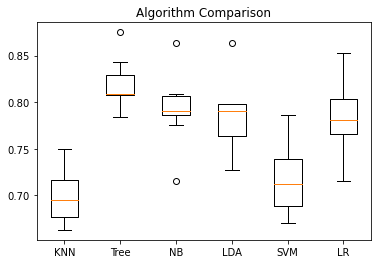

In [159]:
## import the library of Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

names = ['Pclass', 'Sex', 'Age', 'Siblings', 'Parents', 'Fare']
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier(max_depth=5)))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

**Summary**

From the figure of Algorithm Comparison, we can easily define the Desicion Tree model with the depth as 5 is the most accurate and both of the K-Nearest Neighbours and SVM models have the lowest accuracy around 0.7. That is no the fault of algorithms! Since there is a lack of hyper-parameter tuning for KNN and SVM such as the K value in KNN model and the C and W values in SVM model, those models can not predict our training set very logically under their structures. The Desicion Tree model is the only one which do not need any constant variable to adjust. It just divides all the samples again and again. That is why this model behaves best with its special stability.

All in all, due to the lack of validation set and adjusting constant variables, those algorithms are tend to be overfit in real application cases. If our high school students need to choose one of them for solving real problems in daily life, Decision Tree it is because it do not need us to check those constant variables and is easy to explain with our own logic.

### That is the end of my Prediction Algorithms Assignment. Thanks for reading!

## Alex Chen
## Ms. Postma
## ICS4U-01
## 2021/03/30